In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline

from pylab import rcParams
#from plotly import tools
# import plotly.plotly as py
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

# 导入并观察数据

In [2]:
data = pd.read_csv("./dataset/dataset.csv", index_col = 0)

In [3]:
data = data.drop('meanpressure', axis = 1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 3 columns):
meantemp      1462 non-null float64
humidity      1462 non-null float64
wind_speed    1462 non-null float64
dtypes: float64(3)
memory usage: 45.7+ KB


In [5]:
data.head(10)

,meantemp,humidity,wind_speed
date,,,
2013-01-01,10.000000,84.500000,0.000000
2013-01-02,7.400000,92.000000,2.980000
2013-01-03,7.166667,87.000000,4.633333
2013-01-04,8.666667,71.333333,1.233333
2013-01-05,6.000000,86.833333,3.700000
2013-01-06,7.000000,82.800000,1.480000
2013-01-07,7.000000,78.600000,6.300000
2013-01-08,8.857143,63.714286,7.142857
2013-01-09,14.000000,51.250000,12.500000


In [40]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
meantemp,1462.0,25.495521,7.348103,6.000000,18.857143,27.714286,31.305804,38.714286
humidity,1462.0,60.771702,16.769652,13.428571,50.375000,62.625000,72.218750,100.000000
wind_speed,1462.0,6.802209,4.561602,0.000000,3.475000,6.221667,9.238235,42.220000


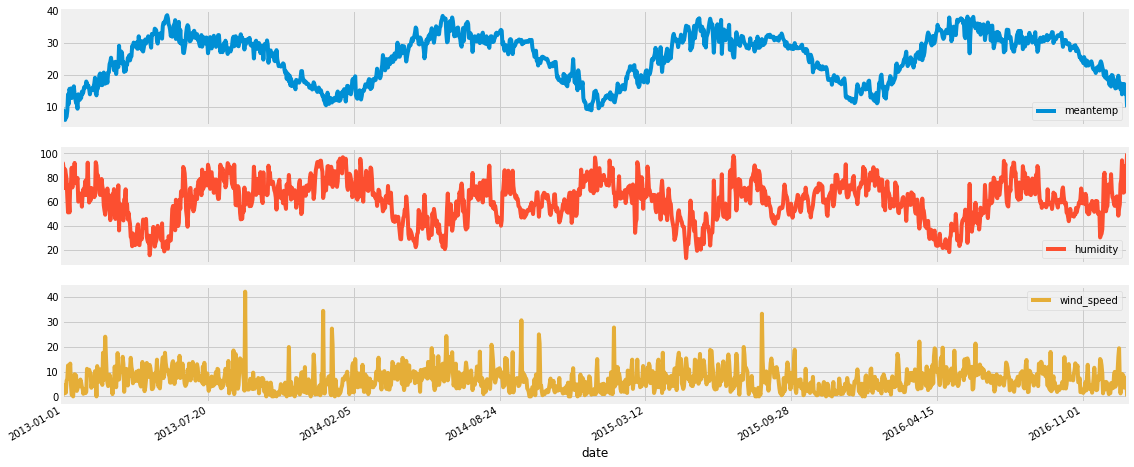

In [64]:
data.plot(subplots=True, figsize = (17,8)) 
plt.show()

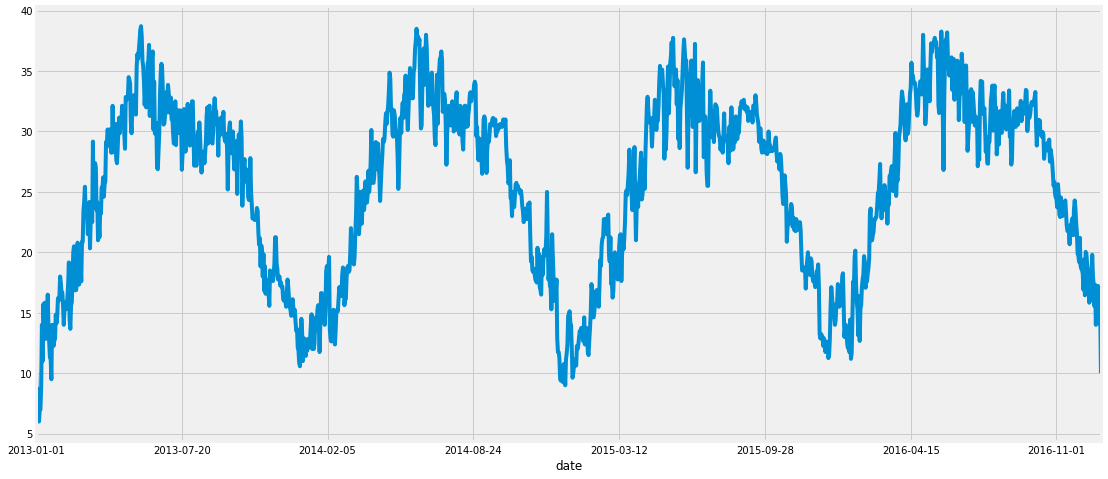

In [48]:
data['meantemp'].plot(figsize=(17,8))
plt.show()

In [10]:
meantemp_data = data['meantemp']
meantemp_data

date
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1462, dtype: float64

# 时间序列分解

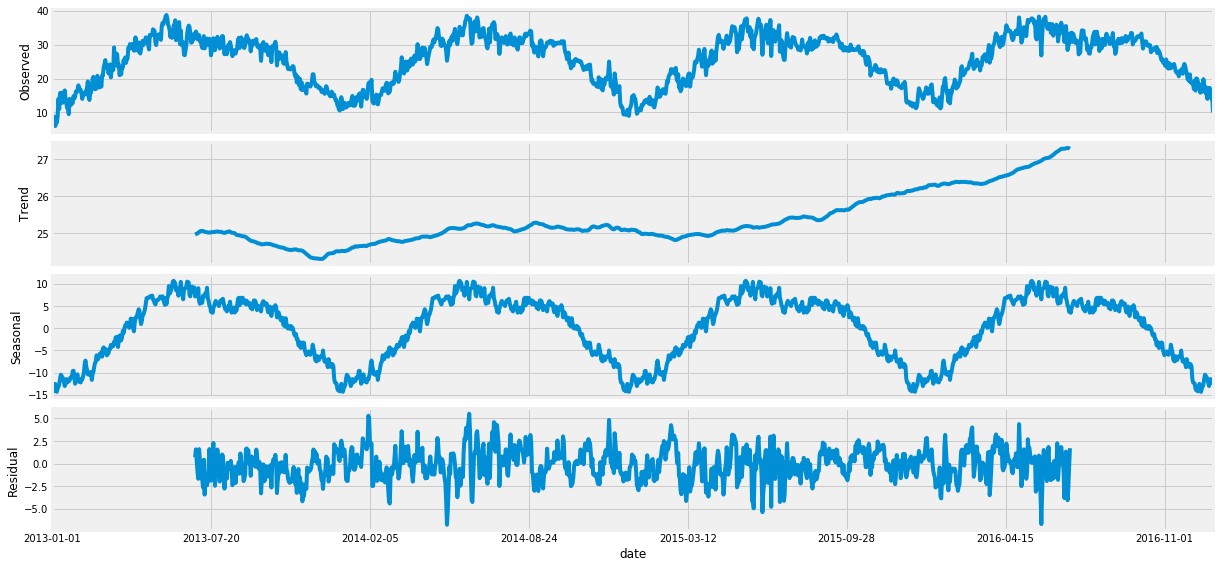

In [11]:
rcParams['figure.figsize'] = 17, 8
meantemp_data_volume = sm.tsa.seasonal_decompose(meantemp_data,freq=360) # 频率为一年
figure = meantemp_data_volume.plot()
plt.show()

# 时间序列数据类型

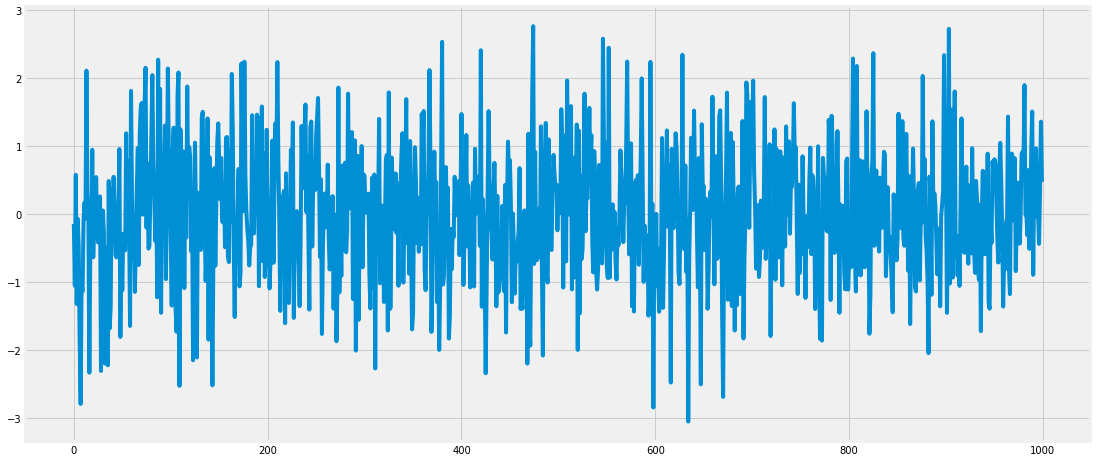

In [7]:
rcParams['figure.figsize'] = 17, 8
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc是均值，scale是方差
plt.plot(white_noise)

平均温度曲线

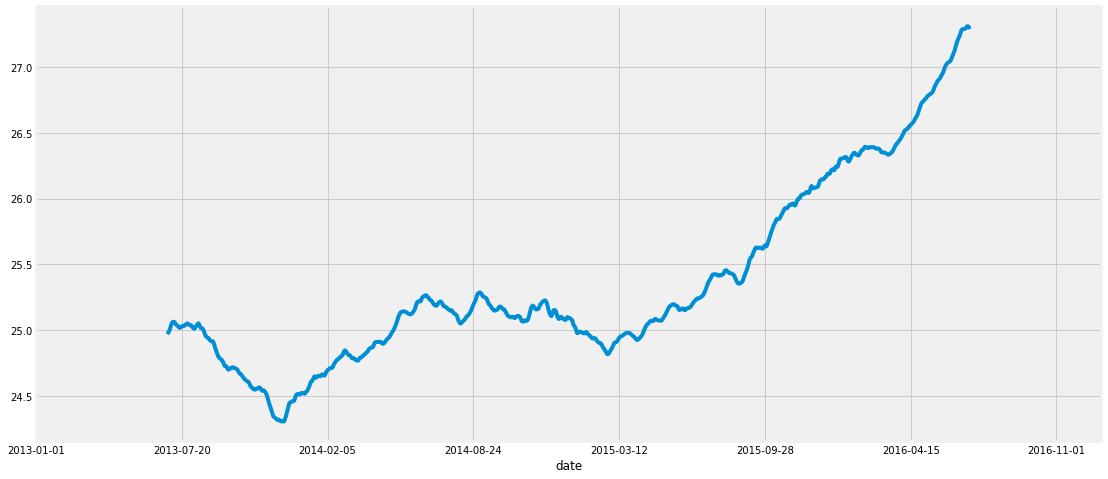

In [12]:
meantemp_data_volume.trend.plot()

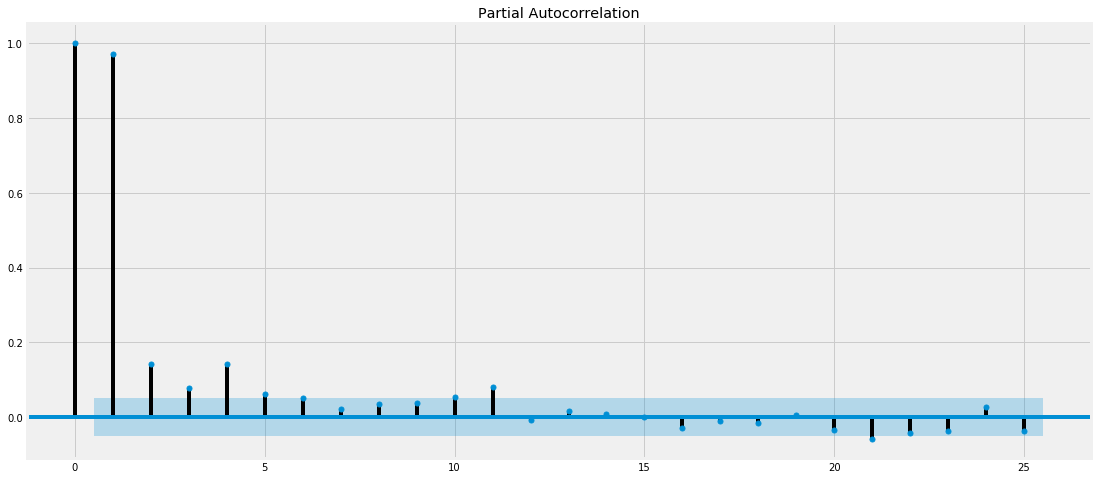

In [15]:
plot_pacf(meantemp_data,lags=25)
plt.show()

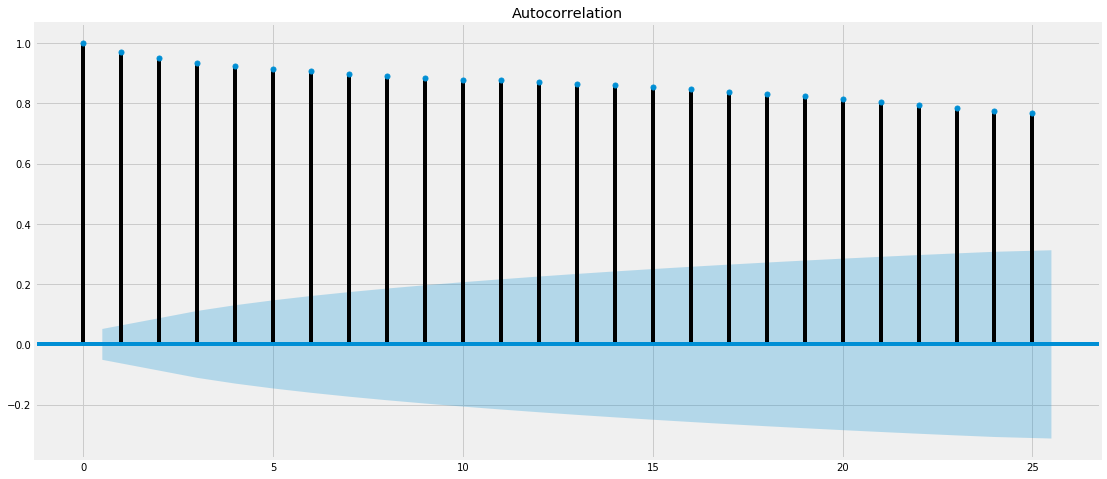

In [16]:
plot_acf(meantemp_data,lags=25)
plt.show()

# 数据预处理

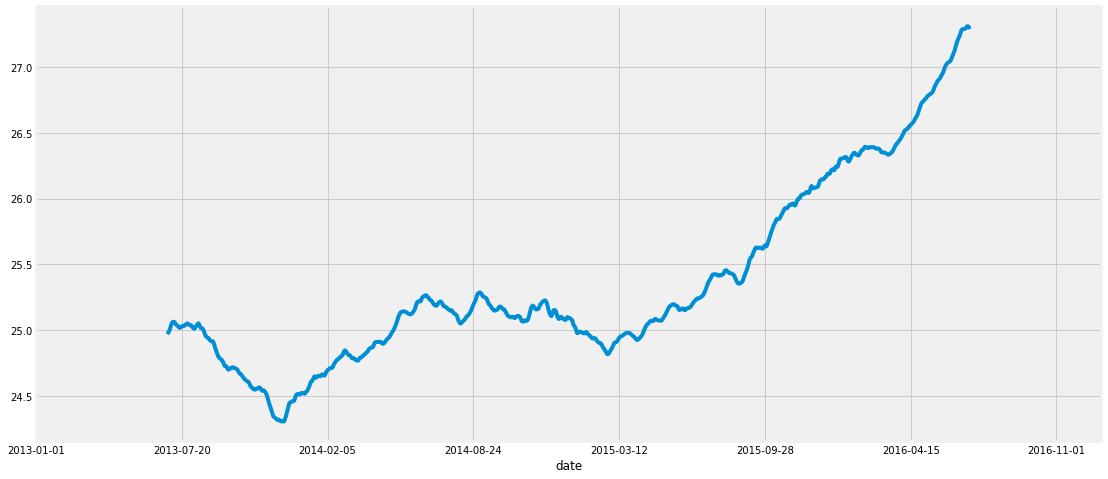

In [17]:
meantemp_data_volume.trend.plot()

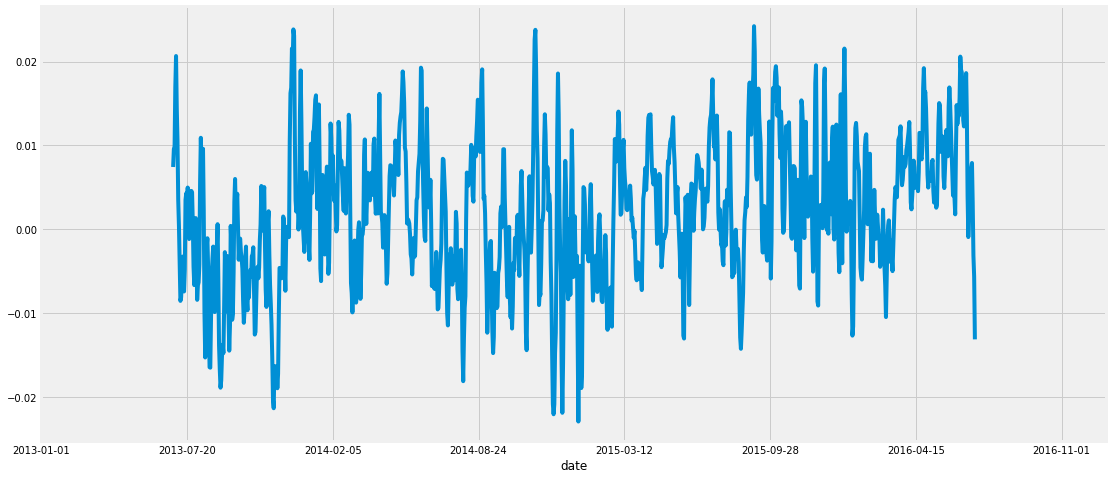

In [18]:
meantemp_data_volume.trend.diff().plot()

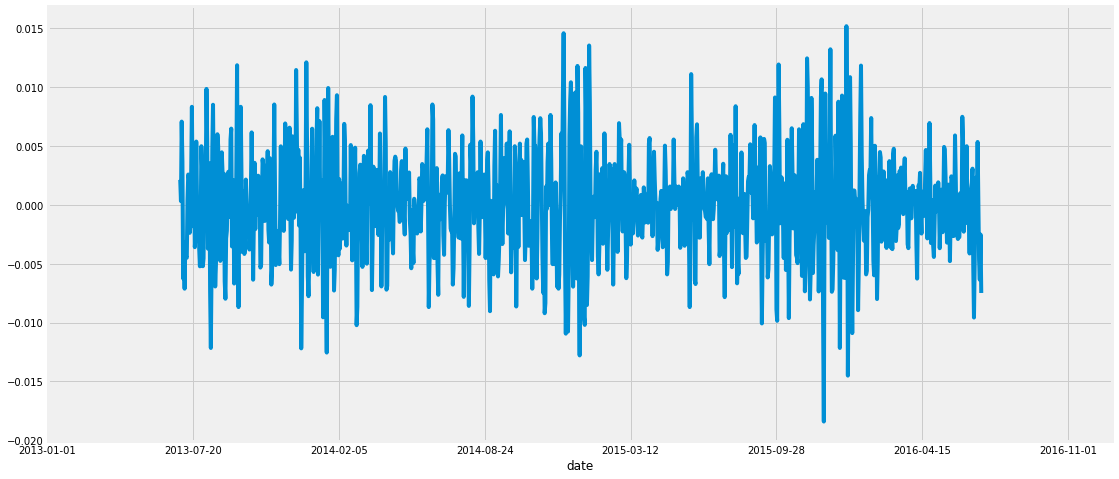

In [19]:
meantemp_data_volume.trend.diff().diff().plot()

# 数据可视化

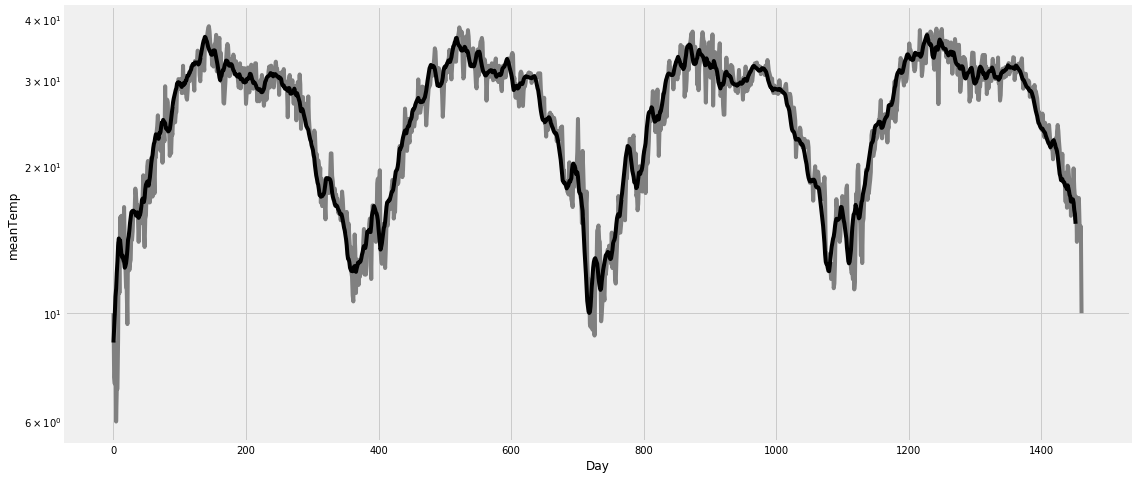

In [63]:
window = 10
days = [r for r in range(meantemp_data.shape[0])]
fig, ax = plt.subplots(figsize = (17,8))
plt.ylabel('meanTemp')
plt.xlabel('Day')

ax.plot(days,meantemp_data.values,color='grey')
ax.plot(np.convolve(meantemp_data, 
                    np.ones((window,))/window, 
                    mode='valid'),color='black')
ax.set_yscale('log')

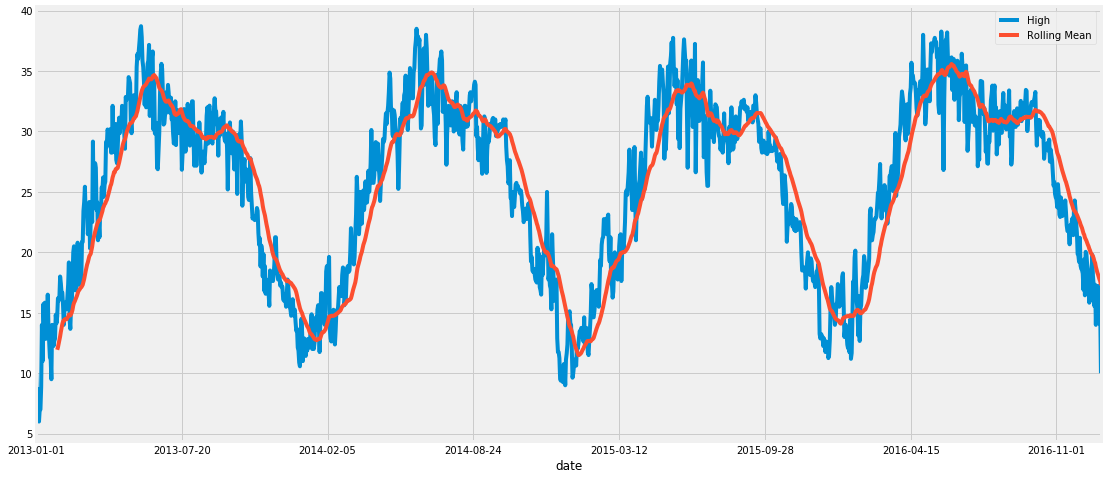

In [62]:
# 滑动窗口
rolling_meantemp_data = meantemp_data.rolling(window=30).mean()
meantemp_data.plot(figsize = (17,8))
rolling_meantemp_data.plot()
plt.legend(['High','Rolling Mean'])
plt.show()

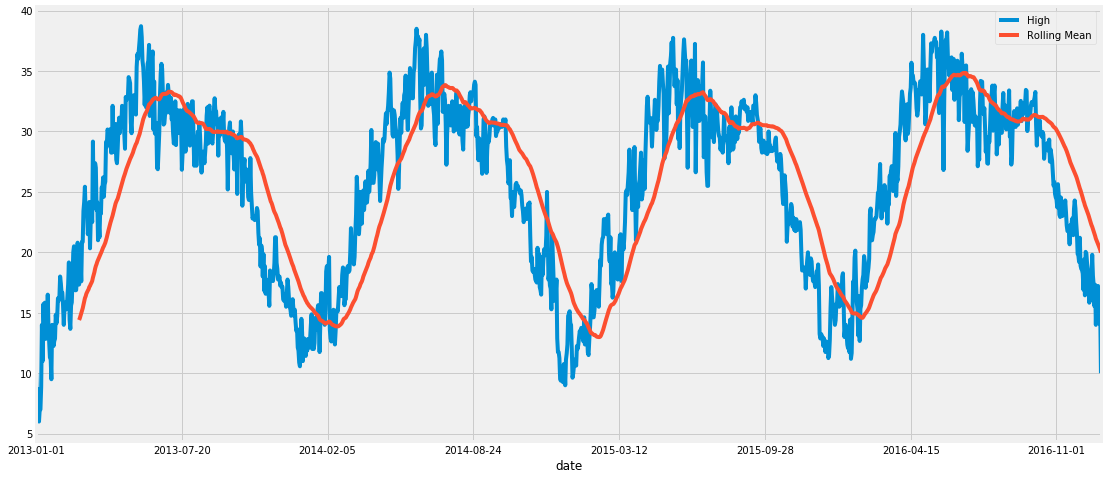

In [61]:
rolling_meantemp_data = meantemp_data.rolling(window=60).mean()
meantemp_data.plot(figsize = (17,8))
rolling_meantemp_data.plot()
plt.legend(['High','Rolling Mean'])
plt.show()

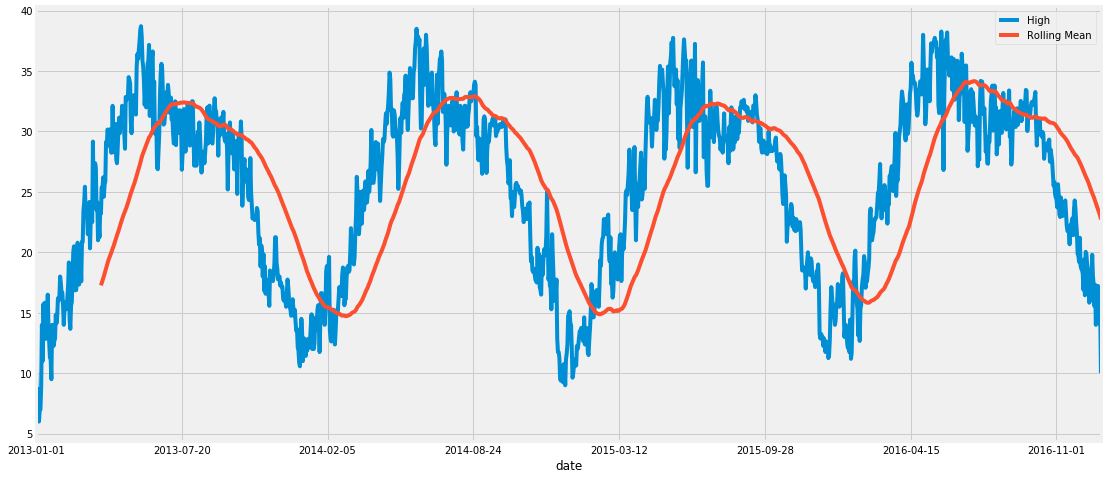

In [60]:
rolling_meantemp_data = meantemp_data.rolling(window=90).mean()
meantemp_data.plot(figsize = (17,8))
rolling_meantemp_data.plot()
plt.legend(['High','Rolling Mean'])
plt.show()

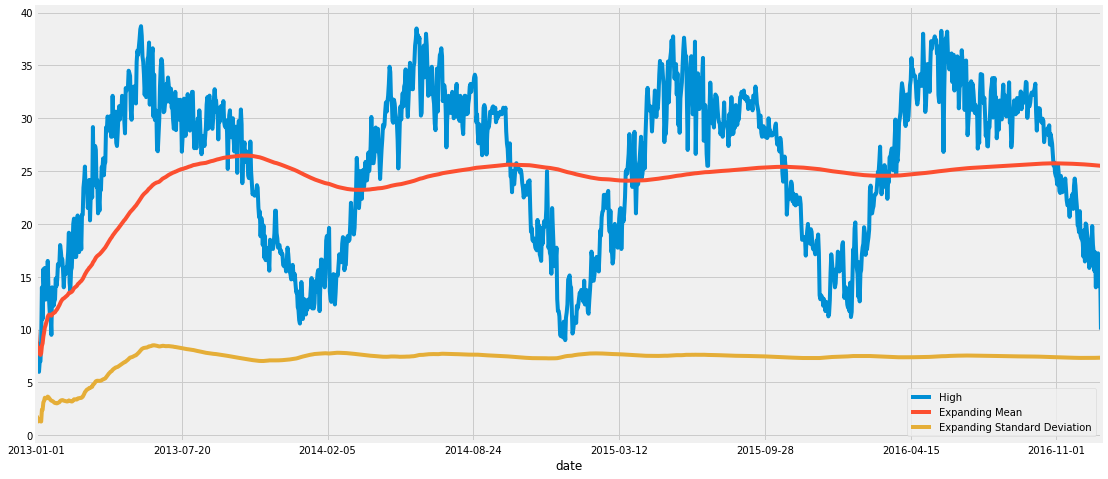

In [59]:
meantemp_data_mean = meantemp_data.expanding().mean()
meantemp_data_std = meantemp_data.expanding().std()
meantemp_data.plot(figsize = (17,8))
meantemp_data_mean.plot()
meantemp_data_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

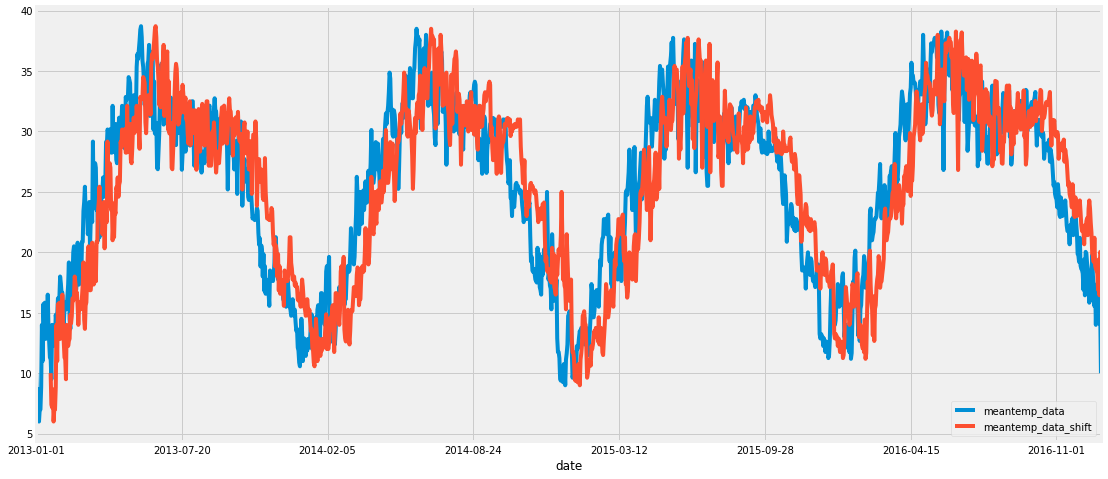

In [24]:
meantemp_data.plot(legend=True)
shifted = meantemp_data.shift(20).plot(legend=True)
shifted.legend(['meantemp_data','meantemp_data_shift'])
plt.show()

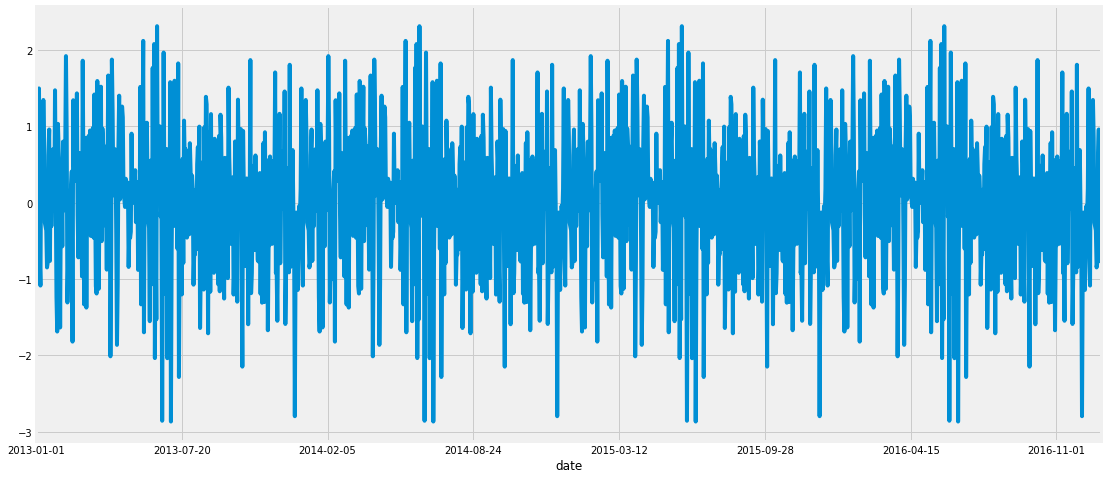

In [73]:
meantemp_data_volume.seasonal.diff().plot()

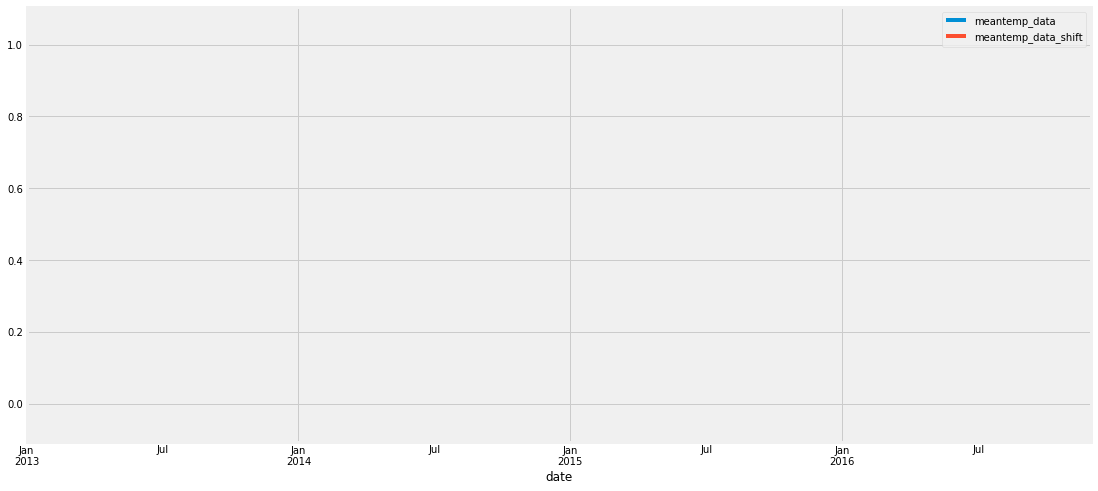

In [78]:
# 滞后图
meantemp_data.asfreq('M').plot(legend=True)
shifted = meantemp_data.asfreq('M').shift(10).plot(legend=True)
shifted.legend(['meantemp_data','meantemp_data_shift'])
plt.show()